In [203]:
import numpy as np
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import plotly.express as px
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings("ignore")

In [204]:
#import book dataset
df=pd.read_csv("C:/Users/romai/Documents/DSTI/4-Python Labs/Project/Python/dataset/books_v2.csv", index_col="bookID", on_bad_lines = 'error')

# Feature Engineering:
- Delete Unnecessary columns 
- Filling missing values 
- Dropping outliers for columns: num_pages, ratings count, Text review Count

## Data Cleaning

In [205]:
#Dropping useless columns: isbn and isbn13
df = df.drop(columns = ['isbn','isbn13'])

In [206]:
#language grouping
df.language_code.value_counts()

eng      8911
en-US    1409
spa       218
en-GB     214
fre       144
ger        99
jpn        46
mul        19
zho        14
grc        11
por        10
en-CA       7
ita         5
enm         3
lat         3
swe         2
rus         2
srp         1
nl          1
msa         1
glg         1
wel         1
ara         1
nor         1
tur         1
gla         1
ale         1
Name: language_code, dtype: int64

In [207]:
df['language_code'] = df['language_code'].replace('en-US','eng')
df['language_code'] = df['language_code'].replace('en-GB','eng')
df['language_code'] = df['language_code'].replace('en-CA','eng')

#or
#df.language_code = books_df.language_code.replace({'en-US':'eng', 'en-GB':'eng', 'en-CA':'eng'})

lang_dict=df.language_code.value_counts().to_dict()
lang_dict.keys()

# drop language < 20 ('mul', 'zho', 'grc', 'por', 'ita', 'lat', 'enm', 'rus', 
# 'swe', 'nl', 'ara', 'srp', 'msa', 'glg', 'wel', 'nor', 'tur', 'gla', 'ale')

dict_keys(['eng', 'spa', 'fre', 'ger', 'jpn', 'mul', 'zho', 'grc', 'por', 'ita', 'lat', 'enm', 'rus', 'swe', 'nl', 'ara', 'srp', 'msa', 'glg', 'wel', 'nor', 'tur', 'gla', 'ale'])

In [208]:
df.columns

Index(['title', 'authors', 'average_rating', 'language_code', '  num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher'],
      dtype='object')

In [209]:
#Renaming '  num_pages' in order to remove the extra spaces and displaying columns names
df.rename(columns={'  num_pages':'num_pages'}, inplace=True)

In [210]:
df.columns

Index(['title', 'authors', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher'],
      dtype='object')

In [211]:
df.head(2)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,09/01/2004,Scholastic Inc.


## Authors

In [212]:
# single author vs multiple authors -> new column "Authors_2" = Single/Multiple -> boolean
df['number_of_authors']=np.where(df['authors'].str.split(pat="/").str.len()==1, "single", "multiple")

#keep 1st author in case of multiple authors and analyze correlation
df['primary_author']=df['authors'].str.split(pat="/").str[0]

df.head(3)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,number_of_authors,primary_author
bookID,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,multiple,J.K. Rowling
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,09/01/2004,Scholastic Inc.,multiple,J.K. Rowling
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,11/01/2003,Scholastic,single,J.K. Rowling


In [213]:
df.groupby(["number_of_authors"]).describe().average_rating

,count,mean,std,min,25%,50%,75%,max
number_of_authors,,,,,,,,
multiple,4564.0,3.964963,0.357029,0.0,3.8075,3.99,4.17,5.0
single,6563.0,3.911842,0.347588,0.0,3.7500,3.94,4.11,5.0


In [214]:
df.groupby(["number_of_authors"]).describe().ratings_count

,count,mean,std,min,25%,50%,75%,max
number_of_authors,,,,,,,,
multiple,4564.0,13947.581288,101337.197228,0.0,70.0,400.0,2563.75,2339585.0
single,6563.0,20710.294530,119546.777221,0.0,161.5,1193.0,7209.00,4597666.0


***
Number of books and pages per authors and average rating

In [215]:
author=df.groupby('primary_author').agg({'average_rating':['count','mean'], 'num_pages':['mean']})
author.columns = [" ".join(x) for x in author.columns.ravel()]
author

,average_rating count,average_rating mean,num_pages mean
primary_author,,,
A.B. Yehoshua,2,3.600000,416.000000
A.D.P. Briggs,1,3.760000,256.000000
A.E. Cunningham,1,4.150000,232.000000
A.J. Jacobs,1,3.760000,389.000000
A.M. Homes,1,3.280000,256.000000
...,...,...,...
Zoë Heller,2,3.710000,251.000000
bell hooks,6,4.230000,188.000000
Åsne Seierstad,3,3.763333,291.333333


## Publication_date

In [216]:
#Change the format of column "publication_date" 
df['publication_date'] = pd.to_datetime(df['publication_date'], dayfirst = False, yearfirst = False, errors = 'coerce')

In [217]:
df.head(2)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,number_of_authors,primary_author
bookID,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,2006-09-16,Scholastic Inc.,multiple,J.K. Rowling
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,2004-09-01,Scholastic Inc.,multiple,J.K. Rowling


In [218]:
df.isna().sum()

title                 0
authors               0
average_rating        0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      2
publisher             0
number_of_authors     0
primary_author        0
dtype: int64

In [219]:
df.loc[df.publication_date.isna(),:]

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,number_of_authors,primary_author
bookID,,,,,,,,,,,
31373,In Pursuit of the Proper Sinner (Inspector Lyn...,Elizabeth George,4.10,eng,718,10608,295,NaT,Bantam Books,single,Elizabeth George
45531,Montaillou village occitan de 1294 à 1324,Emmanuel Le Roy Ladurie/Emmanuel Le Roy-Ladurie,3.96,fre,640,15,2,NaT,Folio histoire,multiple,Emmanuel Le Roy Ladurie


those 2 dates are unreal in the sense that
    # November doesn't have 31 days (11/31/2000)
    # June doesn't have 31 days (31/06/1982)
    
=> replace by correct date for those 2 rows

    #31373 published October 31, 2000 by Bantam Books (https://www.goodreads.com/book/show/31373.In_Pursuit_of_the_Proper_Sinner?ac=1&from_search=true&qid=3A5Zotzgsy&rank=1)
    
    #45531 published June 30, 1982 by Folio histoire (https://www.goodreads.com/book/show/45531.Montaillou_village_occitan_de_1294_1324)

In [220]:
#correcting 2 NaT by correct date
df.loc[31373,"publication_date"]='10/30/2000'
df.loc[45531,"publication_date"] ='6/30/1982'
df.loc[[31373,45531]]

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,number_of_authors,primary_author
bookID,,,,,,,,,,,
31373,In Pursuit of the Proper Sinner (Inspector Lyn...,Elizabeth George,4.10,eng,718,10608,295,2000-10-30,Bantam Books,single,Elizabeth George
45531,Montaillou village occitan de 1294 à 1324,Emmanuel Le Roy Ladurie/Emmanuel Le Roy-Ladurie,3.96,fre,640,15,2,1982-06-30,Folio histoire,multiple,Emmanuel Le Roy Ladurie


In [221]:
# Splitting date column into month and year columns - move in FE
df['publication_month'] = df['publication_date'].dt.month
df['publication_year'] = df['publication_date'].dt.year


df.head(2)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,number_of_authors,primary_author,publication_month,publication_year
bookID,,,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,2006-09-16,Scholastic Inc.,multiple,J.K. Rowling,9,2006
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,2004-09-01,Scholastic Inc.,multiple,J.K. Rowling,9,2004


In [222]:
print("Type of publication_month is:", df.publication_month.dtypes)
print("Type of publication_year is:",df.publication_year.dtypes)
#return type 'Object' -> convert to integer type

Type of publication_month is: int64
Type of publication_year is: int64


In [223]:
df.groupby(["publication_month"]).describe().average_rating

,count,mean,std,min,25%,50%,75%,max
publication_month,,,,,,,,
1,1058.0,3.935123,0.391895,0.0,3.79,3.970,4.14,5.00
2,742.0,3.939677,0.310352,2.0,3.78,3.960,4.13,5.00
3,832.0,3.917055,0.365252,0.0,3.78,3.940,4.11,5.00
4,993.0,3.914642,0.321800,0.0,3.76,3.950,4.12,5.00
5,923.0,3.891863,0.394633,0.0,3.75,3.930,4.10,5.00
6,880.0,3.957250,0.325422,0.0,3.78,3.965,4.16,5.00
7,786.0,3.915165,0.349827,0.0,3.76,3.940,4.12,5.00
8,853.0,3.922626,0.349353,0.0,3.77,3.950,4.12,4.62
9,1278.0,3.954734,0.349687,0.0,3.79,3.970,4.14,5.00


In [224]:
yearly_rating=df.groupby(["publication_year"]).describe().average_rating
yearly_rating

,count,mean,std,min,25%,50%,75%,max
publication_year,,,,,,,,
1900,1.0,3.880000,NaN,3.88,3.8800,3.88,3.8800,3.88
1913,1.0,3.960000,NaN,3.96,3.9600,3.96,3.9600,3.96
1914,1.0,3.950000,NaN,3.95,3.9500,3.95,3.9500,3.95
1919,1.0,4.320000,NaN,4.32,4.3200,4.32,4.3200,4.32
1921,2.0,4.140000,0.296985,3.93,4.0350,4.14,4.2450,4.35
...,...,...,...,...,...,...,...,...
2016,6.0,3.903333,0.476557,2.98,3.8950,4.05,4.1675,4.29
2017,7.0,3.867143,0.377347,3.11,3.8150,3.88,4.1050,4.24
2018,5.0,4.014000,0.219043,3.74,3.8600,4.02,4.1800,4.27


## Pages

In [225]:
df.num_pages.describe()

count    11127.000000
mean       336.376921
std        241.127305
min          0.000000
25%        192.000000
50%        299.000000
75%        416.000000
max       6576.000000
Name: num_pages, dtype: float64

In [226]:
df.num_pages.value_counts().sort_index(axis = 0).head(30)

0     76
1     11
2     15
3     19
4     11
5     16
6     20
7      6
8     10
9     11
10    13
11     7
12    14
13     8
14    15
15     7
16    10
17     2
18     2
20     3
21     1
22     1
24    20
25     1
26     1
27     1
28     2
29     2
30     3
31     3
Name: num_pages, dtype: int64

In [227]:
df[df.num_pages == 1].head(15)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,number_of_authors,primary_author,publication_month,publication_year
bookID,,,,,,,,,,,,,
12582,Essential Welty: Why I Live at the P.O. A Mem...,Eudora Welty,3.94,eng,1,92,28,2006-06-27,Caedmon,single,Eudora Welty,6,2006
15330,The Return of the King (The Lord of the Rings ...,Brian Sibley/J.R.R. Tolkien,4.35,eng,1,17,3,2002-03-04,BBC Audiobooks Ltd,multiple,Brian Sibley,3,2002
17872,Lobsters,Charles Stross/Shandra Marie/Jared Doreck,3.83,eng,1,158,5,2005-08-11,AudioText,multiple,Charles Stross,8,2005
17873,Antibodies,Charles Stross/Shandra Marie/Jared Doreck,3.46,eng,1,67,4,2005-08-11,AudioText,multiple,Charles Stross,8,2005
20971,Meditations for Manifesting: Morning and Eveni...,Wayne W. Dyer,4.02,eng,1,338,12,1995-06-01,Hay House,single,Wayne W. Dyer,6,1995
21545,The Best American Mystery Stories 2003,Michael Connelly/Otto Penzler,3.60,eng,1,5,2,2003-11-04,Mariner Books,multiple,Michael Connelly,11,2003
21703,The Best American Mystery Stories 2002,James Ellroy/Otto Penzler/John Biguenet/Michae...,3.58,eng,1,0,0,2002-10-15,Mariner Books,multiple,James Ellroy,10,2002
22337,The Neil Gaiman Audio Collection,Neil Gaiman,4.24,eng,1,1666,208,2004-08-31,HarperFestival,single,Neil Gaiman,8,2004
32668,LT's Theory of Pets,Stephen King,3.69,eng,1,2824,140,2001-08-01,Simon Schuster Audio,single,Stephen King,8,2001


* Num_pages == 0 to 15 seems to be Audio Books -> remove or create a new column AUDIBLE vs READABLE
***

In [228]:
audio_df=df[df.num_pages>24]
audio_df.sort_values(by = ['num_pages']).head(10)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,number_of_authors,primary_author,publication_month,publication_year
bookID,,,,,,,,,,,,,
2386,Moby Dick,Herman Melville/William Hootkins,3.50,eng,25,67,17,2005-09-01,Naxos Audiobooks,multiple,Herman Melville,9,2005
9072,The Historian,Elizabeth Kostova/Paul Michael/Justine Eyre,3.78,eng,26,354,135,2005-12-13,Books on Tape,multiple,Elizabeth Kostova,12,2005
45325,Joseph Cornell: Secrets in a Box (Adventures i...,Alison Baverstock/Joseph Cornell/Christopher W...,4.03,eng,27,32,5,2003-09-01,Prestel Publishing,multiple,Alison Baverstock,9,2003
17296,Music of the Meadow (Little Einsteins Early Re...,Susan Ring/Kelly Preston/Katie Nix,3.70,eng,28,26,1,2006-09-01,Disney Press,multiple,Susan Ring,9,2006
7615,Farm Animals (A Chunky Book),Phoebe Dunn,3.86,eng,28,35,4,1984-02-12,Random House Books for Young Readers,single,Phoebe Dunn,2,1984
44849,Code Check Electrical: An Illustrated Guide to...,Michael Casey/Redwood Kardon/Douglas Hansen,4.67,eng,29,3,0,2005-11-11,Taunton Press,multiple,Michael Casey,11,2005
3051,Sir Gawain and the Green Knight,Selina Shirley Hastings/Juan Wijngaard,3.91,eng,29,65,9,1991-06-27,Walker Books Ltd,multiple,Selina Shirley Hastings,6,1991
4601,Click Clack Moo: Cows That Type,Doreen Cronin/Betsy Lewin,4.24,eng,30,348,33,2003-06-01,Pocket Books,multiple,Doreen Cronin,6,2003
26216,Patrick: Patron Saint of Ireland,Tomie dePaola,4.08,eng,30,89,5,1992-01-01,Holiday House,single,Tomie dePaola,1,1992


In [229]:
# look at different publisher name to see if audio book or not
keep= ["fono"]

#filter for rows that contain the partial string "Wes" in the conference column
df[df.publisher.str.contains('|'.join(keep))].sort_values(by = ['num_pages'])

# "Tantor Media"-containing publisher name = AUDIO (note: pages <= 6)
# "Caedmon"-containing publisher name = AUDIO (note: pages <= 11)
# "HarperFestival"-containing publisher name = AUDIO (note: 1 "book" counts 31 pages but it's 31 CDs)
# "Pimsleur"-containing publisher name = AUDIO (note: only 1 book)
# "FonoLibro"-containing publisher name = AUDIO (note: only 1 book - 18 pages
# "Disney Press", Warne" AND "TSR Inc" publish short book for kids
# "Studio"-containing publisher name = only paper book - to keep

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,number_of_authors,primary_author,publication_month,publication_year
bookID,,,,,,,,,,,,,


Create new column "Type" with 2 categories: AUDIBLE or READABLE
* 1. Select title with CD
* 2. Apply on publisher based on the list ["Audio", "Record", "Sound", "Tape", "Tantor", "Warner Adult", "HarperFestival","Pimsleur", "FonoLibro"]
* 3. Apply on num_pages <=15 (assumption that all books with less (or equal) than 15 pages are Audio)

In [230]:
keep= ["Audio", "Record", "Sound", "Tape", "Tantor", "Warner Adult", "HarperFestival","Pimsleur", "FonoLibro"]
conditions = [df.authors == 'NOT A BOOK', df.title.str.contains('|'.join(["CD"])), df.publisher.str.contains('|'.join(keep)), df.num_pages <= 15]
choices =['audible','audible', 'audible','audible']                                                                                  
df['type'] = np.select(conditions, choices, default="readable")                                                                             
                                                                                  
#df[df.authors == 'NOT A BOOK']
df.head(11)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,number_of_authors,primary_author,publication_month,publication_year,type
bookID,,,,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,2006-09-16,Scholastic Inc.,multiple,J.K. Rowling,9,2006,readable
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,2004-09-01,Scholastic Inc.,multiple,J.K. Rowling,9,2004,readable
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,2003-11-01,Scholastic,single,J.K. Rowling,11,2003,readable
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,2004-05-01,Scholastic Inc.,multiple,J.K. Rowling,5,2004,readable
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,2004-09-13,Scholastic,multiple,J.K. Rowling,9,2004,readable
9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,eng,152,19,1,2005-04-26,Nimble Books,single,W. Frederick Zimmerman,4,2005,readable
10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,eng,3342,28242,808,2005-09-12,Scholastic,single,J.K. Rowling,9,2005,readable
12,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,eng,815,3628,254,2005-11-01,Gramercy Books,single,Douglas Adams,11,2005,readable
13,The Ultimate Hitchhiker's Guide to the Galaxy ...,Douglas Adams,4.38,eng,815,249558,4080,2002-04-30,Del Rey Books,single,Douglas Adams,4,2002,readable


In [231]:
df.groupby(["type"]).describe().average_rating
#imbalanced => not interesting

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
audible,296.0,3.984155,0.420386,0.0,3.8275,4.005,4.20,5.0
readable,10831.0,3.932250,0.350324,0.0,3.7700,3.960,4.13,5.0


In [232]:
#Dropping outliers for 'num_pages' column 
#df = df.drop(index = df[df.num_pages > 1500].index)

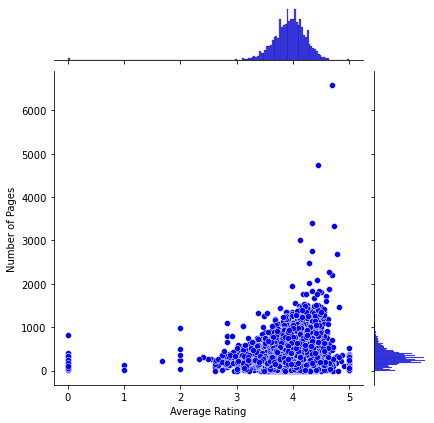

In [233]:
ax1 = sns.jointplot(x="average_rating", y="num_pages", data = df, color = 'blue')
ax1.set_axis_labels("Average Rating", "Number of Pages")

## Average rating categorization

In [234]:
# 5.001 to include the rating = 5
bins = [ 0,3,4, 5.001]
label = ['Low',"Mid","High"]
df['cat_rating'] = pd.cut(df['average_rating'], bins, labels=label, right = False)

In [235]:
df.groupby(["cat_rating"]).count().average_rating

cat_rating
Low       85
Mid     6088
High    4954
Name: average_rating, dtype: int64

Imbalanced data between Low and Mid / High - => SMOTE :)

##  Average_rating / ratings_counts / text_review_counts

In [236]:
print('Number of average_rating = 0: ', df['average_rating'].value_counts()[0])
print('Number of rating_counts = 0: ', df['ratings_count'].value_counts()[0])
print('Number of text_reviews_count = 0: ', df['text_reviews_count'].value_counts()[0])

#rating = 0 with rating_count = 0 -> is it relevant to keep it ro should we replace by the average rating?
# average_rating but no ratings_count or texte_reviews_count? how to consider them

Number of average_rating = 0:  26
Number of rating_counts = 0:  81
Number of text_reviews_count = 0:  625


In [237]:
df[df.average_rating==0].describe()

,average_rating,num_pages,ratings_count,text_reviews_count,publication_month,publication_year
count,26.0,26.000000,26.0,26.000000,26.000000,26.000000
mean,0.0,219.692308,0.0,0.038462,6.500000,1996.846154
std,0.0,169.046921,0.0,0.196116,3.744329,8.446028
min,0.0,5.000000,0.0,0.000000,1.000000,1977.000000
25%,0.0,100.000000,0.0,0.000000,3.250000,1993.000000
50%,0.0,216.000000,0.0,0.000000,6.500000,1999.000000
75%,0.0,293.250000,0.0,0.000000,9.000000,2002.000000
max,0.0,830.000000,0.0,1.000000,12.000000,2011.000000


In [238]:
df[df.average_rating==0].loc[df.text_reviews_count!=0]
#1 text review but no rating associated (ratings count =0)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,number_of_authors,primary_author,publication_month,publication_year,type,cat_rating
bookID,,,,,,,,,,,,,,,
41044,Day and Night,Better Homes and Gardens,0.0,eng,32,0,1,1989-03-01,Meredith Corporation,single,Better Homes and Gardens,3,1989,readable,Low


Based on those observations, an average rating equal to 0 have a rating count equal to 0 and a text review equal to 0 <br>
There is only one case where we have a text review but still no rating count <br>
Those 26 rows (average rating = 0) are suspicious based on that.<br>

Remove or keep them (that could help predict a rating of 0 meaning that no one take the time to rate a book because it's too long!)
***

In [239]:
df=df.drop(df.loc[df.average_rating ==0].index)
df.describe(include = "all")

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,number_of_authors,primary_author,publication_month,publication_year,type,cat_rating
count,11101,11101,11101.000000,11101,11101.000000,1.110100e+04,11101.000000,11101,11101,11101,11101,11101.000000,11101.000000,11101,11101
unique,10326,6619,NaN,23,NaN,NaN,NaN,3672,2276,2,4200,NaN,NaN,2,3
top,The Brothers Karamazov,P.G. Wodehouse,NaN,eng,NaN,NaN,NaN,2005-10-01 00:00:00,Vintage,single,William Shakespeare,NaN,NaN,readable,Mid
freq,9,40,NaN,10517,NaN,NaN,NaN,56,318,6549,88,NaN,NaN,10806,6088
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,3.942844,NaN,336.650212,1.797842e+04,543.123502,NaN,NaN,NaN,NaN,6.546798,2000.175300,NaN,NaN
std,NaN,NaN,0.296950,NaN,241.209946,1.126077e+05,2579.058368,NaN,NaN,NaN,NaN,3.413209,8.247188,NaN,NaN
min,NaN,NaN,1.000000,NaN,0.000000,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,1.000000,1900.000000,NaN,NaN
25%,NaN,NaN,3.780000,NaN,193.000000,1.050000e+02,9.000000,NaN,NaN,NaN,NaN,4.000000,1998.000000,NaN,NaN


In [240]:
#print('Number of average_rating = 0: ', books_df_copy['average_rating'].value_counts()[0])
print('Number of rating_counts = 0: ', df['ratings_count'].value_counts()[0]) #80-26=54
print('Number of text_reviews_count = 0: ', df['text_reviews_count'].value_counts()[0])#622-26+1 ( text review=1)= 600

Number of rating_counts = 0:  55
Number of text_reviews_count = 0:  600


Still 55 rating_count equal to 0 whereas we have an average_rating at least equal to 1 => how can we have a rating without any count? <br> Let's dig a bit more
***

In [241]:
df[df.ratings_count==0].head(5)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,number_of_authors,primary_author,publication_month,publication_year,type,cat_rating
bookID,,,,,,,,,,,,,,,
797,Lonely Planet Londres,Lonely Planet/Sarah Johnstone/Tom Masters,4.03,spa,480,0,0,2006-05-01,Geoplaneta,multiple,Lonely Planet,5,2006,readable,High
1658,American Government: Continuity and Change Al...,Karen O'Connor/Larry J. Sabato,2.83,eng,664,0,0,2005-03-11,Longman Publishing Group,multiple,Karen O'Connor,3,2005,readable,Low
1664,Essentials of American and Texas Government: C...,Karen O'Connor/Larry J. Sabato,3.50,eng,854,0,0,2005-07-29,Longman Publishing Group,multiple,Karen O'Connor,7,2005,readable,Mid
2034,Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...,Aristophanes/F.W. Hall/W.M. Geldart,5.00,grc,364,0,0,1922-02-22,Oxford University Press USA,multiple,Aristophanes,2,1922,readable,High
2411,Melville and the politics of identity: From *K...,Julian Markels,3.33,eng,164,0,0,1993-07-01,University of Illinois Press,single,Julian Markels,7,1993,readable,Mid


Replace 0 by average ratings_counts or drop? **Replace** by mean ratings_counts

In [242]:
avg_count = df.groupby(["cat_rating"]).mean().ratings_count.to_dict()
avg_count

{'Low': 1106.7457627118645,
 'Mid': 15089.132720105124,
 'High': 21730.01332256762}

In [243]:
#create a function to replace null value in ratings_count by the mean of the rating group (low/mid/high)
def count_guesser(count):
    avg = avg_count[count]
    return avg

print('Low: ',count_guesser('Low'))
print('Mid: ',count_guesser('Mid'))
print('High: ',count_guesser('High'))

Low:  1106.7457627118645
Mid:  15089.132720105124
High:  21730.01332256762


In [244]:
df[df.ratings_count==0]

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,number_of_authors,primary_author,publication_month,publication_year,type,cat_rating
bookID,,,,,,,,,,,,,,,
797,Lonely Planet Londres,Lonely Planet/Sarah Johnstone/Tom Masters,4.03,spa,480,0,0,2006-05-01,Geoplaneta,multiple,Lonely Planet,5,2006,readable,High
1658,American Government: Continuity and Change Al...,Karen O'Connor/Larry J. Sabato,2.83,eng,664,0,0,2005-03-11,Longman Publishing Group,multiple,Karen O'Connor,3,2005,readable,Low
1664,Essentials of American and Texas Government: C...,Karen O'Connor/Larry J. Sabato,3.50,eng,854,0,0,2005-07-29,Longman Publishing Group,multiple,Karen O'Connor,7,2005,readable,Mid
2034,Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...,Aristophanes/F.W. Hall/W.M. Geldart,5.00,grc,364,0,0,1922-02-22,Oxford University Press USA,multiple,Aristophanes,2,1922,readable,High
2411,Melville and the politics of identity: From *K...,Julian Markels,3.33,eng,164,0,0,1993-07-01,University of Illinois Press,single,Julian Markels,7,1993,readable,Mid
3084,April May und June,Elizabeth von Arnim,3.88,ger,88,0,0,1995-04-01,Insel Frankfurt,single,Elizabeth von Arnim,4,1995,readable,Mid
3754,Dr No / Moonraker / Thunderball / From Russia ...,Ian Fleming,3.98,eng,862,0,0,1984-01-01,Heinemann-Octopus,single,Ian Fleming,1,1984,readable,Mid
5863,V.S. Naipaul,Bruce Alvin King,2.00,eng,240,0,0,2003-10-10,Palgrave Macmillan,single,Bruce Alvin King,10,2003,readable,Low
7400,The Baby Emergency (Tennengarrah Clinic #1),Carol Marinelli,3.60,eng,285,0,0,2004-06-01,Mills & Boon,single,Carol Marinelli,6,2004,readable,Mid


In [245]:
raw_df = df.copy()
for rate in avg_count.keys():
    temp_df = raw_df.loc[(df.cat_rating == rate),:]
    missing_values_index = temp_df.loc[temp_df.ratings_count == 0].index
    raw_df.loc[missing_values_index,"ratings_count"] = count_guesser(rate)

In [246]:
raw_df.loc[7400].ratings_count

15089.132720105124

In [247]:
df=raw_df.copy()
df

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,number_of_authors,primary_author,publication_month,publication_year,type,cat_rating
bookID,,,,,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690.0,27591,2006-09-16,Scholastic Inc.,multiple,J.K. Rowling,9,2006,readable,High
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167.0,29221,2004-09-01,Scholastic Inc.,multiple,J.K. Rowling,9,2004,readable,High
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333.0,244,2003-11-01,Scholastic,single,J.K. Rowling,11,2003,readable,High
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585.0,36325,2004-05-01,Scholastic Inc.,multiple,J.K. Rowling,5,2004,readable,High
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428.0,164,2004-09-13,Scholastic,multiple,J.K. Rowling,9,2004,readable,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,eng,512,156.0,20,2004-12-21,Da Capo Press,multiple,William T. Vollmann,12,2004,readable,High
45633,You Bright and Risen Angels,William T. Vollmann,4.08,eng,635,783.0,56,1988-12-01,Penguin Books,single,William T. Vollmann,12,1988,readable,High
45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,eng,415,820.0,95,1993-08-01,Penguin Books,single,William T. Vollmann,8,1993,readable,Mid


In [248]:
df['text_reviews_count'].describe()

count    11101.000000
mean       543.123502
std       2579.058368
min          0.000000
25%          9.000000
50%         47.000000
75%        239.000000
max      94265.000000
Name: text_reviews_count, dtype: float64

In [249]:
df['text_reviews_count'].value_counts()[0]

600

## Encode categorical data

In [260]:
labelencoder = LabelEncoder()
df['language_cat'] = labelencoder.fit_transform(df['language_code'])
df

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,number_of_authors,primary_author,publication_month,publication_year,type,cat_rating,language_cat,co-author,author_cat
bookID,,,,,,,,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690.0,27591,2006-09-16,Scholastic Inc.,multiple,J.K. Rowling,9,2006,readable,High,2,1,1590
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167.0,29221,2004-09-01,Scholastic Inc.,multiple,J.K. Rowling,9,2004,readable,High,2,1,1590
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333.0,244,2003-11-01,Scholastic,single,J.K. Rowling,11,2003,readable,High,2,0,1590
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585.0,36325,2004-05-01,Scholastic Inc.,multiple,J.K. Rowling,5,2004,readable,High,2,1,1590
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428.0,164,2004-09-13,Scholastic,multiple,J.K. Rowling,9,2004,readable,High,2,1,1590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,eng,512,156.0,20,2004-12-21,Da Capo Press,multiple,William T. Vollmann,12,2004,readable,High,2,1,4154
45633,You Bright and Risen Angels,William T. Vollmann,4.08,eng,635,783.0,56,1988-12-01,Penguin Books,single,William T. Vollmann,12,1988,readable,High,2,0,4154
45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,eng,415,820.0,95,1993-08-01,Penguin Books,single,William T. Vollmann,8,1993,readable,Mid,2,0,4154


In [251]:
df["co-author"] = df['number_of_authors'].replace({'single': 0, 'multiple': 1})

In [252]:
df['author_cat'] = labelencoder.fit_transform(df['primary_author'])

In [253]:
df

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,number_of_authors,primary_author,publication_month,publication_year,type,cat_rating,language_cat,co-author,author_cat
bookID,,,,,,,,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690.0,27591,2006-09-16,Scholastic Inc.,multiple,J.K. Rowling,9,2006,readable,High,2,1,1590
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167.0,29221,2004-09-01,Scholastic Inc.,multiple,J.K. Rowling,9,2004,readable,High,2,1,1590
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333.0,244,2003-11-01,Scholastic,single,J.K. Rowling,11,2003,readable,High,2,0,1590
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585.0,36325,2004-05-01,Scholastic Inc.,multiple,J.K. Rowling,5,2004,readable,High,2,1,1590
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428.0,164,2004-09-13,Scholastic,multiple,J.K. Rowling,9,2004,readable,High,2,1,1590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,eng,512,156.0,20,2004-12-21,Da Capo Press,multiple,William T. Vollmann,12,2004,readable,High,2,1,4154
45633,You Bright and Risen Angels,William T. Vollmann,4.08,eng,635,783.0,56,1988-12-01,Penguin Books,single,William T. Vollmann,12,1988,readable,High,2,0,4154
45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,eng,415,820.0,95,1993-08-01,Penguin Books,single,William T. Vollmann,8,1993,readable,Mid,2,0,4154


## Handling Outliers

### Pages

In [262]:
percentile25 = df['num_pages'].quantile(0.25)
percentile75 = df['num_pages'].quantile(0.75)
iqr = percentile75 - percentile25
print ("IQR: ",iqr)
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
df_no_outliers  = df[df['num_pages']< upper_limit]
df_no_outliers 

IQR:  223.0


,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,number_of_authors,primary_author,publication_month,publication_year,type,cat_rating,language_cat,co-author,author_cat
bookID,,,,,,,,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690.0,27591,2006-09-16,Scholastic Inc.,multiple,J.K. Rowling,9,2006,readable,High,2,1,1590
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333.0,244,2003-11-01,Scholastic,single,J.K. Rowling,11,2003,readable,High,2,0,1590
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585.0,36325,2004-05-01,Scholastic Inc.,multiple,J.K. Rowling,5,2004,readable,High,2,1,1590
9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,eng,152,19.0,1,2005-04-26,Nimble Books,single,W. Frederick Zimmerman,4,2005,readable,Mid,2,0,4050
14,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams,4.22,eng,215,4930.0,460,2004-08-03,Crown,single,Douglas Adams,8,2004,readable,High,2,0,981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,eng,512,156.0,20,2004-12-21,Da Capo Press,multiple,William T. Vollmann,12,2004,readable,High,2,1,4154
45633,You Bright and Risen Angels,William T. Vollmann,4.08,eng,635,783.0,56,1988-12-01,Penguin Books,single,William T. Vollmann,12,1988,readable,High,2,0,4154
45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,eng,415,820.0,95,1993-08-01,Penguin Books,single,William T. Vollmann,8,1993,readable,Mid,2,0,4154


In [263]:
lower_limit

-141.5

### Rating_count

In [264]:
percentile25_rating = df_no_outliers['ratings_count'].quantile(0.25)
percentile75_rating = df_no_outliers['ratings_count'].quantile(0.75)
iqr2 = percentile75_rating - percentile25_rating
print ("IQR: ",iqr2)
upper_limit_rating = percentile75_rating + 1.5 * iqr2
lower_limit_rating = percentile25_rating - 1.5 * iqr2
df_no_outliers = df_no_outliers[df_no_outliers['ratings_count']< upper_limit_rating]
df_no_outliers 

IQR:  5047.0


,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,number_of_authors,primary_author,publication_month,publication_year,type,cat_rating,language_cat,co-author,author_cat
bookID,,,,,,,,,,,,,,,,,,
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333.0,244,2003-11-01,Scholastic,single,J.K. Rowling,11,2003,readable,High,2,0,1590
9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,eng,152,19.0,1,2005-04-26,Nimble Books,single,W. Frederick Zimmerman,4,2005,readable,Mid,2,0,4050
14,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams,4.22,eng,215,4930.0,460,2004-08-03,Crown,single,Douglas Adams,8,2004,readable,High,2,0,981
16,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams/Stephen Fry,4.22,eng,6,1266.0,253,2005-03-23,Random House Audio,multiple,Douglas Adams,3,2005,audible,High,2,1,981
22,Bill Bryson's African Diary,Bill Bryson,3.44,eng,55,7270.0,499,2002-12-03,Broadway Books,single,Bill Bryson,12,2002,readable,Mid,2,0,380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,eng,512,156.0,20,2004-12-21,Da Capo Press,multiple,William T. Vollmann,12,2004,readable,High,2,1,4154
45633,You Bright and Risen Angels,William T. Vollmann,4.08,eng,635,783.0,56,1988-12-01,Penguin Books,single,William T. Vollmann,12,1988,readable,High,2,0,4154
45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,eng,415,820.0,95,1993-08-01,Penguin Books,single,William T. Vollmann,8,1993,readable,Mid,2,0,4154


### Text_Reviews_Count

In [265]:
percentile25_text = df_no_outliers['text_reviews_count'].quantile(0.25)
percentile75_text = df_no_outliers['text_reviews_count'].quantile(0.75)
iqr3 = percentile75_text - percentile25_text
print ("IQR: ",iqr3)
upper_limit_text = percentile75_text + 1.5 * iqr3
lower_limit_text = percentile25_text - 1.5 * iqr3
df_no_outliers  = df_no_outliers[df_no_outliers ['text_reviews_count']< upper_limit_text]
df_no_outliers

IQR:  103.75


,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,number_of_authors,primary_author,publication_month,publication_year,type,cat_rating,language_cat,co-author,author_cat
bookID,,,,,,,,,,,,,,,,,,
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333.0,244,2003-11-01,Scholastic,single,J.K. Rowling,11,2003,readable,High,2,0,1590
9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,eng,152,19.0,1,2005-04-26,Nimble Books,single,W. Frederick Zimmerman,4,2005,readable,Mid,2,0,4050
16,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams/Stephen Fry,4.22,eng,6,1266.0,253,2005-03-23,Random House Audio,multiple,Douglas Adams,3,2005,audible,High,2,1,981
23,Bryson's Dictionary of Troublesome Words: A Wr...,Bill Bryson,3.87,eng,256,2088.0,131,2004-09-14,Broadway Books,single,Bill Bryson,9,2004,readable,Mid,2,0,380
37,The Lord of the Rings: Complete Visual Companion,Jude Fisher,4.50,eng,224,359.0,6,2004-11-15,Houghton Mifflin Harcourt,single,Jude Fisher,11,2004,readable,High,2,0,2074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,eng,512,156.0,20,2004-12-21,Da Capo Press,multiple,William T. Vollmann,12,2004,readable,High,2,1,4154
45633,You Bright and Risen Angels,William T. Vollmann,4.08,eng,635,783.0,56,1988-12-01,Penguin Books,single,William T. Vollmann,12,1988,readable,High,2,0,4154
45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,eng,415,820.0,95,1993-08-01,Penguin Books,single,William T. Vollmann,8,1993,readable,Mid,2,0,4154


In [266]:
df_no_outliers.groupby(["cat_rating"]).count().average_rating

cat_rating
Low       48
Mid     4512
High    3390
Name: average_rating, dtype: int64

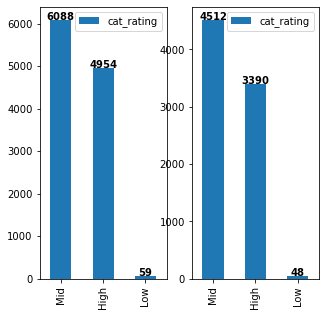

In [267]:
# Chart for average rating by category 
plt.subplot(1,2,1)
value_counts = df['cat_rating'].value_counts()
ax1 = value_counts.plot(kind='bar', figsize=(10, 10))
for i in ax1.patches:
    height = i.get_height()
    ax1.text(i.get_x() + i.get_width() / 2., height + 0.5, f'{height:.0f}', ha='center', fontweight='bold')
ax1.legend()

plt.subplot(1,2,2) 
ax2 = df_no_outliers['cat_rating'].value_counts().plot(kind='bar', figsize=(5, 5))
# Add percentage labels to each bar
for i in ax2.patches:
    height = i.get_height()
    ax2.text(i.get_x() + i.get_width() / 2., height + 0.5, f'{height:.0f}', ha='center', fontweight='bold')
ax2.legend()

plt.show()

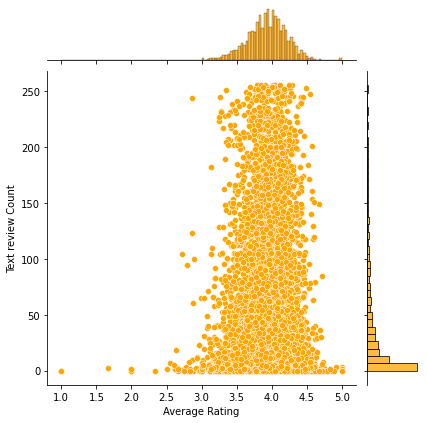

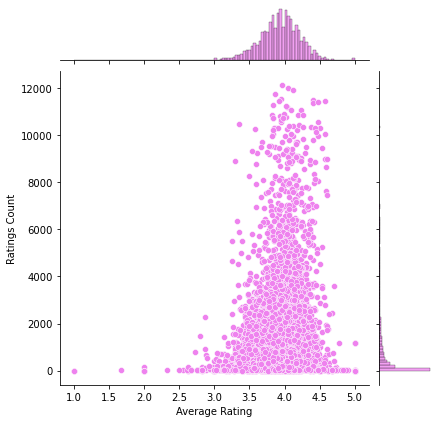

In [57]:
#Average Rating // Text Review Count
ax2 = sns.jointplot(x="average_rating", y="text_reviews_count", data = df, color = 'orange')
ax2.set_axis_labels("Average Rating", "Text review Count")

#drop text_reviews_count above 30000?

#Average Rating // Reviews Count
ax2 = sns.jointplot(x="average_rating", y="ratings_count", data = df, color = 'violet')
ax2.set_axis_labels("Average Rating", "Ratings Count")


plt.show()

## Modelization

### Modelization keeping outliers

In [59]:
df_processed=df.drop(columns=['title','authors', 'average_rating', 'number_of_authors', 'language_code','publication_date', 'publisher','primary_author'])
df_processed

,num_pages,ratings_count,text_reviews_count,publication_month,publication_year,type,cat_rating,language_cat,co-author,author_cat
bookID,,,,,,,,,,
1,652,2095690.0,27591,9,2006,readable,High,2,1,1590
2,870,2153167.0,29221,9,2004,readable,High,2,1,1590
4,352,6333.0,244,11,2003,readable,High,2,0,1590
5,435,2339585.0,36325,5,2004,readable,High,2,1,1590
8,2690,41428.0,164,9,2004,readable,High,2,1,1590
...,...,...,...,...,...,...,...,...,...,...
45631,512,156.0,20,12,2004,readable,High,2,1,4154
45633,635,783.0,56,12,1988,readable,High,2,0,4154
45634,415,820.0,95,8,1993,readable,Mid,2,0,4154


In [286]:
X= df_processed.loc[:,['num_pages', 'ratings_count', 'text_reviews_count', 'publication_month', 'publication_year','language_cat', 'co-author', 'author_cat']].values
y= df_processed.cat_rating.values

https://towardsdatascience.com/how-to-deal-with-imbalanced-multiclass-datasets-in-python-fe0bb3f2b669

In [287]:
# define a balance threshold (below = under balanced / above = over balanced)
count = y.value_counts()
n_samples = np.int64(y.value_counts().median())

print(count)
print(n_samples)

Low       59
Mid     6088
High    4954
dtype: int64
4954


In [288]:
#function to assign the appropirate sampling strategy during rebalancing

def sampling_strategy(X,y,n_samples, t='majority'):
    n_samples = np.int64(y.value_counts().median())
    target_classes = ''
    if t == 'majority':
        target_classes = y.value_counts() > n_samples
# test if the sample size of each category is GREATER (or equal to) than n_samples (here= we consider the MEDIAN)
# and return TRUE or FALSE

    elif t == 'minority':
        target_classes = y.value_counts() < n_samples
# test if the sample size of each category is LOWER than n_samples (here= we consider the MEDIAN)
# and return TRUE or FALSE

    tc = target_classes[target_classes == True].index
    #target_classes_all = y.value_counts().index
    
    sampling_strategy = {}
#create a dict to store output of the loop that will be used for undersampling and oversampling
    
    for target in tc:
        if t=='majority':
            sampling_strategy[target] = np.int64(1.05*n_samples) # we decide to keep majority class a bit "over balanced"
        else:
            sampling_strategy[target] = np.int64(0.95*n_samples)  # we decide to keep minority class a bit "under balanced"
    return sampling_strategy

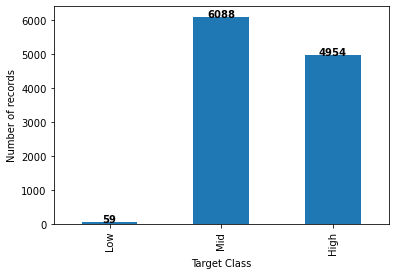

In [289]:
#plot the class size before resampling
count = y.value_counts()
ax=count.plot.bar()
plt.ylabel('Number of records')
plt.xlabel('Target Class')

for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x() + i.get_width() / 2., height + 0.5, f'{height:.0f}', ha='center', fontweight='bold')



plt.show()

https://scikit-learn.org/stable/modules/model_evaluation.html
https://stephenallwright.com/cross_val_score-sklearn/
https://scikit-learn.org/stable/modules/cross_validation.html

In [175]:
#Oversample with SMOTE and random undersample for imbalanced dataset
from collections import Counter
from matplotlib import pyplot
from numpy import where


from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier


# define pipeline
over = SMOTE(sampling_strategy=sampling_strategy(X, y,n_samples, t='minority'), k_neighbors=5, random_state=63)
under = RandomUnderSampler(sampling_strategy=sampling_strategy(X,y,n_samples, t='majority'), random_state=63)
model = DecisionTreeClassifier()
steps = [('o', over), ('u', under), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)

# evaluate pipeline
print (model,":")
for score in ['roc_auc_ovr','accuracy', 'f1_weighted']:
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=63)
    scores = cross_val_score(pipeline,X, y, scoring= score, cv=cv, n_jobs=-1, error_score="raise")
    print(score,':%.3f (%.3f)'% (scores.mean(),(scores.std())))

    
#print('Mean ROC AUC: %.3f' % np.mean(scores))
#print('Accuracy: %.3f (%.3f)' % (np.mean(score), np.std(score)))

DecisionTreeClassifier() :
roc_auc_ovr :0.547 (0.017)
accuracy :0.552 (0.012)
f1_weighted :0.557 (0.013)


In [291]:
#Oversample with SMOTE and random undersample for imbalanced dataset
import time
from collections import Counter
from matplotlib import pyplot
from numpy import where

from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.linear_model import LogisticRegression
#from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# define pipeline
over = SMOTE(sampling_strategy=sampling_strategy(X, y,n_samples, t='minority'), k_neighbors=5, random_state=63)
under = RandomUnderSampler(sampling_strategy=sampling_strategy(X,y,n_samples, t='majority'), random_state=63)


# evaluate pipeline

models = [LogisticRegression(),
          KNeighborsClassifier(), 
          DecisionTreeClassifier(), 
          GaussianNB(), 
          RandomForestClassifier(n_estimators=10, max_depth=None,min_samples_split=2),
          AdaBoostClassifier(n_estimators=100),
          GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)]

names = ["Logistic Regression","K-Nearest Neighbor","Decision Tree", "Naive Bayes", "Random Forest", 
         "AdaBoost classifier","Gradient Boosting Classifier"]

for model, name in zip(models, names):
    start = time.time()
    steps = [('o', over), ('u', under), ('model', model)]
    pipeline = Pipeline(steps=steps)

    print ('\033[1m'+name+'\033[0m')
    
    scorers = ['roc_auc_ovr','accuracy', 'f1_weighted', 'recall_weighted', 'precision_weighted']
    score_names = ["ROC AUC", "Accuracy", "F1 score", "Recall", "Precision"]
    
    for score, name in zip(scorers, score_names):
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=63)
        scores = cross_val_score(pipeline,X, y, scoring= score, cv=cv, n_jobs=-1, error_score="raise")
        print(name,': %.3f (%.3f)'% (scores.mean(),(scores.std())))
    
    print('\nExecution time: ', time.time() - start, '\n')



Logistic Regression
ROC AUC : 0.576 (0.034)
Accuracy : 0.293 (0.018)
F1 score : 0.381 (0.019)
Recall : 0.293 (0.018)
Precision : 0.576 (0.019)

Execution time:  18.186164379119873 

K-Nearest Neighbor
ROC AUC : 0.582 (0.037)
Accuracy : 0.504 (0.017)
F1 score : 0.531 (0.018)
Recall : 0.504 (0.017)
Precision : 0.563 (0.019)

Execution time:  2.3804712295532227 

Decision Tree
ROC AUC : 0.548 (0.014)
Accuracy : 0.552 (0.014)
F1 score : 0.555 (0.013)
Recall : 0.554 (0.014)
Precision : 0.558 (0.012)

Execution time:  2.991018056869507 

Naive Bayes
ROC AUC : 0.550 (0.032)
Accuracy : 0.133 (0.011)
F1 score : 0.206 (0.017)
Recall : 0.133 (0.011)
Precision : 0.590 (0.035)

Execution time:  1.719677448272705 

Random Forest
ROC AUC : 0.629 (0.030)
Accuracy : 0.579 (0.015)
F1 score : 0.580 (0.016)
Recall : 0.577 (0.013)
Precision : 0.586 (0.013)

Execution time:  4.66169810295105 

AdaBoost classifier
ROC AUC : 0.569 (0.040)
Accuracy : 0.562 (0.015)
F1 score : 0.562 (0.017)
Recall : 0.562 (0.015

### Modelization removing outliers

In [268]:
df_no_outliers_processed=df_no_outliers.drop(columns=['title','authors', 'average_rating', 'number_of_authors', 'language_code','publication_date', 'publisher','primary_author'])
df_no_outliers_processed

,num_pages,ratings_count,text_reviews_count,publication_month,publication_year,type,cat_rating,language_cat,co-author,author_cat
bookID,,,,,,,,,,
4,352,6333.0,244,11,2003,readable,High,2,0,1590
9,152,19.0,1,4,2005,readable,Mid,2,0,4050
16,6,1266.0,253,3,2005,audible,High,2,1,981
23,256,2088.0,131,9,2004,readable,Mid,2,0,380
37,224,359.0,6,11,2004,readable,High,2,0,2074
...,...,...,...,...,...,...,...,...,...,...
45631,512,156.0,20,12,2004,readable,High,2,1,4154
45633,635,783.0,56,12,1988,readable,High,2,0,4154
45634,415,820.0,95,8,1993,readable,Mid,2,0,4154


In [270]:

X= df_no_outliers_processed.loc[:,['num_pages', 'ratings_count', 'text_reviews_count', 'publication_month', 'publication_year','language_cat', 'co-author', 'author_cat']].values
y= df_no_outliers_processed.cat_rating.values


In [271]:
X

array([[3.520e+02, 6.333e+03, 2.440e+02, ..., 2.000e+00, 0.000e+00,
        1.590e+03],
       [1.520e+02, 1.900e+01, 1.000e+00, ..., 2.000e+00, 0.000e+00,
        4.050e+03],
       [6.000e+00, 1.266e+03, 2.530e+02, ..., 2.000e+00, 1.000e+00,
        9.810e+02],
       ...,
       [4.150e+02, 8.200e+02, 9.500e+01, ..., 2.000e+00, 0.000e+00,
        4.154e+03],
       [4.340e+02, 7.690e+02, 1.390e+02, ..., 2.000e+00, 0.000e+00,
        4.154e+03],
       [2.720e+02, 1.130e+02, 1.200e+01, ..., 1.800e+01, 0.000e+00,
        2.597e+03]])

In [272]:
# define a balance threshold (below = under balanced / above = over balanced)
count = y.value_counts()
n_samples = np.int64(y.value_counts().median())

print(count)
print(n_samples)

Low       48
Mid     4512
High    3390
dtype: int64
3390


In [273]:
#function to assign the appropirate sampling strategy during rebalancing

def sampling_strategy(X,y,n_samples, t='majority'):
    n_samples = np.int64(y.value_counts().median())
    target_classes = ''
    if t == 'majority':
        target_classes = y.value_counts() > n_samples
# test if the sample size of each category is GREATER (or equal to) than n_samples (here= we consider the MEDIAN)
# and return TRUE or FALSE

    elif t == 'minority':
        target_classes = y.value_counts() < n_samples
# test if the sample size of each category is LOWER than n_samples (here= we consider the MEDIAN)
# and return TRUE or FALSE

    tc = target_classes[target_classes == True].index
    #target_classes_all = y.value_counts().index
    
    sampling_strategy = {}
#create a dict to store output of the loop that will be used for undersampling and oversampling
    
    for target in tc:
        if t=='majority':
            sampling_strategy[target] = np.int64(1.05*n_samples) # we decide to keep majority class a bit "over balanced"
        else:
            sampling_strategy[target] = np.int64(0.95*n_samples)  # we decide to keep minority class a bit "under balanced"
    return sampling_strategy

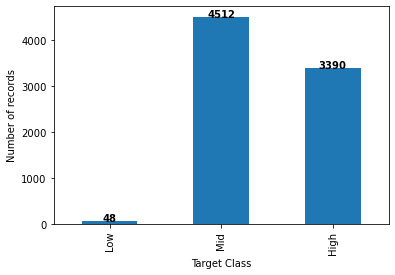

In [274]:
#plot the class size before resampling
count = y.value_counts()
ax=count.plot.bar()
plt.ylabel('Number of records')
plt.xlabel('Target Class')

for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x() + i.get_width() / 2., height + 0.5, f'{height:.0f}', ha='center', fontweight='bold')



plt.show()

https://scikit-learn.org/stable/modules/model_evaluation.html
https://stephenallwright.com/cross_val_score-sklearn/
https://scikit-learn.org/stable/modules/cross_validation.html


In [275]:
#Oversample with SMOTE and random undersample for imbalanced dataset
from collections import Counter
from matplotlib import pyplot
from numpy import where


from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier


# define pipeline
over = SMOTE(sampling_strategy=sampling_strategy(X, y,n_samples, t='minority'), k_neighbors=5, random_state=63)
under = RandomUnderSampler(sampling_strategy=sampling_strategy(X,y,n_samples, t='majority'), random_state=63)
model = DecisionTreeClassifier()
steps = [('o', over), ('u', under), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)

# evaluate pipeline
print (model,":")
for score in ['roc_auc_ovr','accuracy', 'f1_weighted']:
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=63)
    scores = cross_val_score(pipeline,X, y, scoring= score, cv=cv, n_jobs=-1, error_score="raise")
    print(score,':%.3f (%.3f)'% (scores.mean(),(scores.std())))

    
#print('Mean ROC AUC: %.3f' % np.mean(scores))
#print('Accuracy: %.3f (%.3f)' % (np.mean(score), np.std(score)))

DecisionTreeClassifier() :
roc_auc_ovr :0.542 (0.018)
accuracy :0.542 (0.015)
f1_weighted :0.543 (0.015)


In [282]:
#Oversample with SMOTE and random undersample for imbalanced dataset
import time
from collections import Counter
from matplotlib import pyplot
from numpy import where

from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.linear_model import LogisticRegression
#from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# define pipeline
over = SMOTE(sampling_strategy=sampling_strategy(X, y,n_samples, t='minority'), k_neighbors=5, random_state=63)
under = RandomUnderSampler(sampling_strategy=sampling_strategy(X,y,n_samples, t='majority'), random_state=63)


# evaluate pipeline

models = [LogisticRegression(),
          KNeighborsClassifier(), 
          DecisionTreeClassifier(), 
          GaussianNB(), 
          RandomForestClassifier(n_estimators=10, max_depth=None,min_samples_split=2),
          AdaBoostClassifier(n_estimators=100),
          GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)]

names = ["Logistic Regression","K-Nearest Neighbor","Decision Tree", "Naive Bayes", "Random Forest", 
         "AdaBoost classifier","Gradient Boosting Classifier"]

for model, name in zip(models, names):
    start = time.time()
    steps = [('o', over), ('u', under), ('model', model)]
    pipeline = Pipeline(steps=steps)

    print ('\033[1m'+name+'\033[0m')
    
    scorers = ['roc_auc_ovr','accuracy', 'f1_weighted', 'recall_weighted', 'precision_weighted']
    score_names = ["ROC AUC", "Accuracy", "F1 score", "Recall", "Precision"]
    
    for score, name in zip(scorers, score_names):
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=63)
        scores = cross_val_score(pipeline,X, y, scoring= score, cv=cv, n_jobs=-1, error_score="raise")
        print(name,': %.3f (%.3f)'% (scores.mean(),(scores.std())))
    
    print('\nExecution time: ', time.time() - start, '\n')



Logistic Regression
ROC AUC : 0.587 (0.033)
Accuracy : 0.359 (0.014)
F1 score : 0.422 (0.018)
Recall : 0.359 (0.014)
Precision : 0.580 (0.020)

Execution time:  11.762601613998413 

K-Nearest Neighbor
ROC AUC : 0.583 (0.037)
Accuracy : 0.496 (0.018)
F1 score : 0.524 (0.017)
Recall : 0.496 (0.018)
Precision : 0.557 (0.017)

Execution time:  1.512042760848999 

Decision Tree
ROC AUC : 0.540 (0.018)
Accuracy : 0.543 (0.015)
F1 score : 0.545 (0.013)
Recall : 0.542 (0.015)
Precision : 0.555 (0.015)

Execution time:  1.850703239440918 

Naive Bayes
ROC AUC : 0.572 (0.030)
Accuracy : 0.254 (0.020)
F1 score : 0.349 (0.021)
Recall : 0.254 (0.020)
Precision : 0.589 (0.022)

Execution time:  1.109215259552002 

Random Forest
ROC AUC : 0.600 (0.034)
Accuracy : 0.560 (0.019)
F1 score : 0.565 (0.019)
Recall : 0.553 (0.022)
Precision : 0.572 (0.020)

Execution time:  3.140902519226074 

AdaBoost classifier
ROC AUC : 0.555 (0.041)
Accuracy : 0.554 (0.016)
F1 score : 0.549 (0.018)
Recall : 0.554 (0.016